# Model Selection and Classification Exercise

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

## The Bank Marketing Data Set

* The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

* More information please visit: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


### Attribute Information:

### Bank client data:
* `age` (numeric)
* `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* `default`: has credit in default? (categorical: 'no','yes','unknown')
* `housing`: has housing loan? (categorical: 'no','yes','unknown')
* `loan`: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
* `contact`: contact communication type (categorical: 'cellular','telephone') 
* `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

### Other attributes:
* `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* `previous`: number of contacts performed before this campaign and for this client (numeric)
* `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and economic context attributes
* `emp.var.rate`: employment variation rate - quarterly indicator (numeric)
* `cons.price.idx`: consumer price index - monthly indicator (numeric) 
* `cons.conf.idx`: consumer confidence index - monthly indicator (numeric) 
* `euribor3m`: euribor 3 month rate - daily indicator (numeric)
* `nr.employed`: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
* `y` - has the client subscribed a term deposit? (binary: 'yes','no')

## Problem Statement

### You are assigned to build a classification model to predict a probability that a client will subscribe a term deposit so that the company can target the right clients.

### Implement model selection; candidate models are Logistic Regression and Decision Tree; 
### Use 'roc_auc' as evaluation metric: https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it

In [76]:
import pandas as pd

df = pd.read_csv('bank/bank-additional-full.csv')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Exploration

In [77]:
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

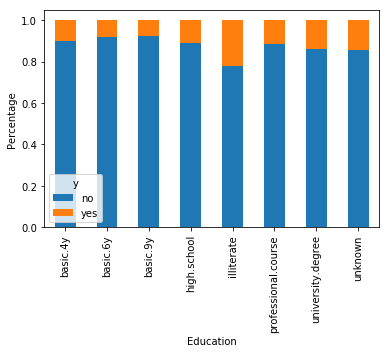

In [4]:
education_y = pd.crosstab(df.education, df.y)
education_y.div(education_y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Education')
plt.ylabel('Percentage')

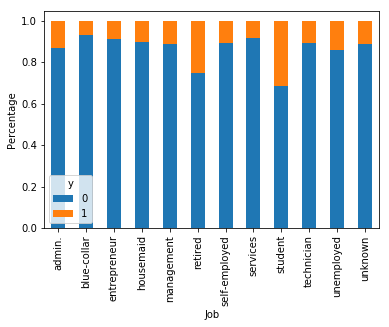

In [46]:
job_y = pd.crosstab(df.job, df.y)
job_y.div(job_y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Job')
plt.ylabel('Percentage')

In [18]:
df['cons.conf.idx'].mean()
df['cons.conf.idx'].std()

4.6281978561745438

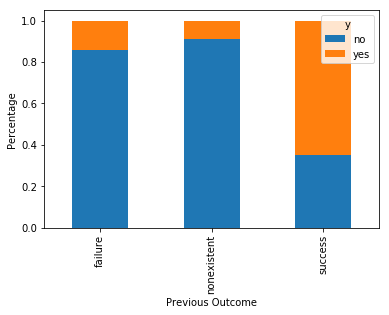

In [19]:
"""
DO SOME DATA EXPLORATION
"""
poutcome_y = pd.crosstab(df.poutcome, df.y)
poutcome_y.div(poutcome_y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Previous Outcome')
plt.ylabel('Percentage')

In [ ]:
poutcome_y = pd.crosstab(df.poutcome, df.y)
poutcome_y.div(poutcome_y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Previous Outcome')
plt.ylabel('Percentage')

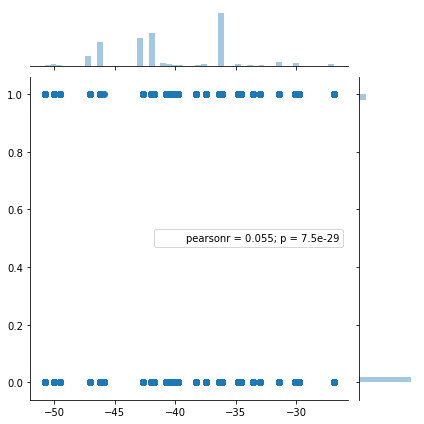

In [55]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline

y2 = df.y.values
le = LabelEncoder()
y2 = le.fit_transform(y2)

sns.jointplot(x=df['cons.conf.idx'].values,y=y2,kind='scatter')


y = df.y.values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

df['y']=le.fit_transform(df.y.values)
df['housing']=le.fit_transform(df.housing.values)
df['loan']=le.fit_transform(df.loan.values)
df['poutcome']=le.fit_transform(df.poutcome.values)

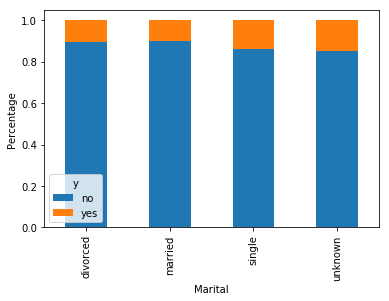

In [32]:
marital_y = pd.crosstab(df.marital, df.y)
marital_y.div(marital_y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Marital')
plt.ylabel('Percentage')

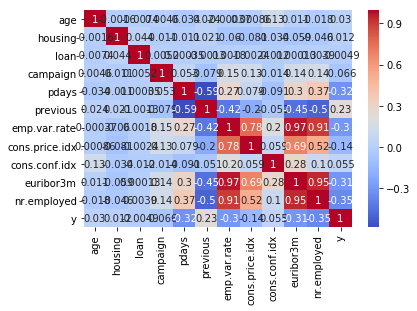

In [51]:
df.corr()
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

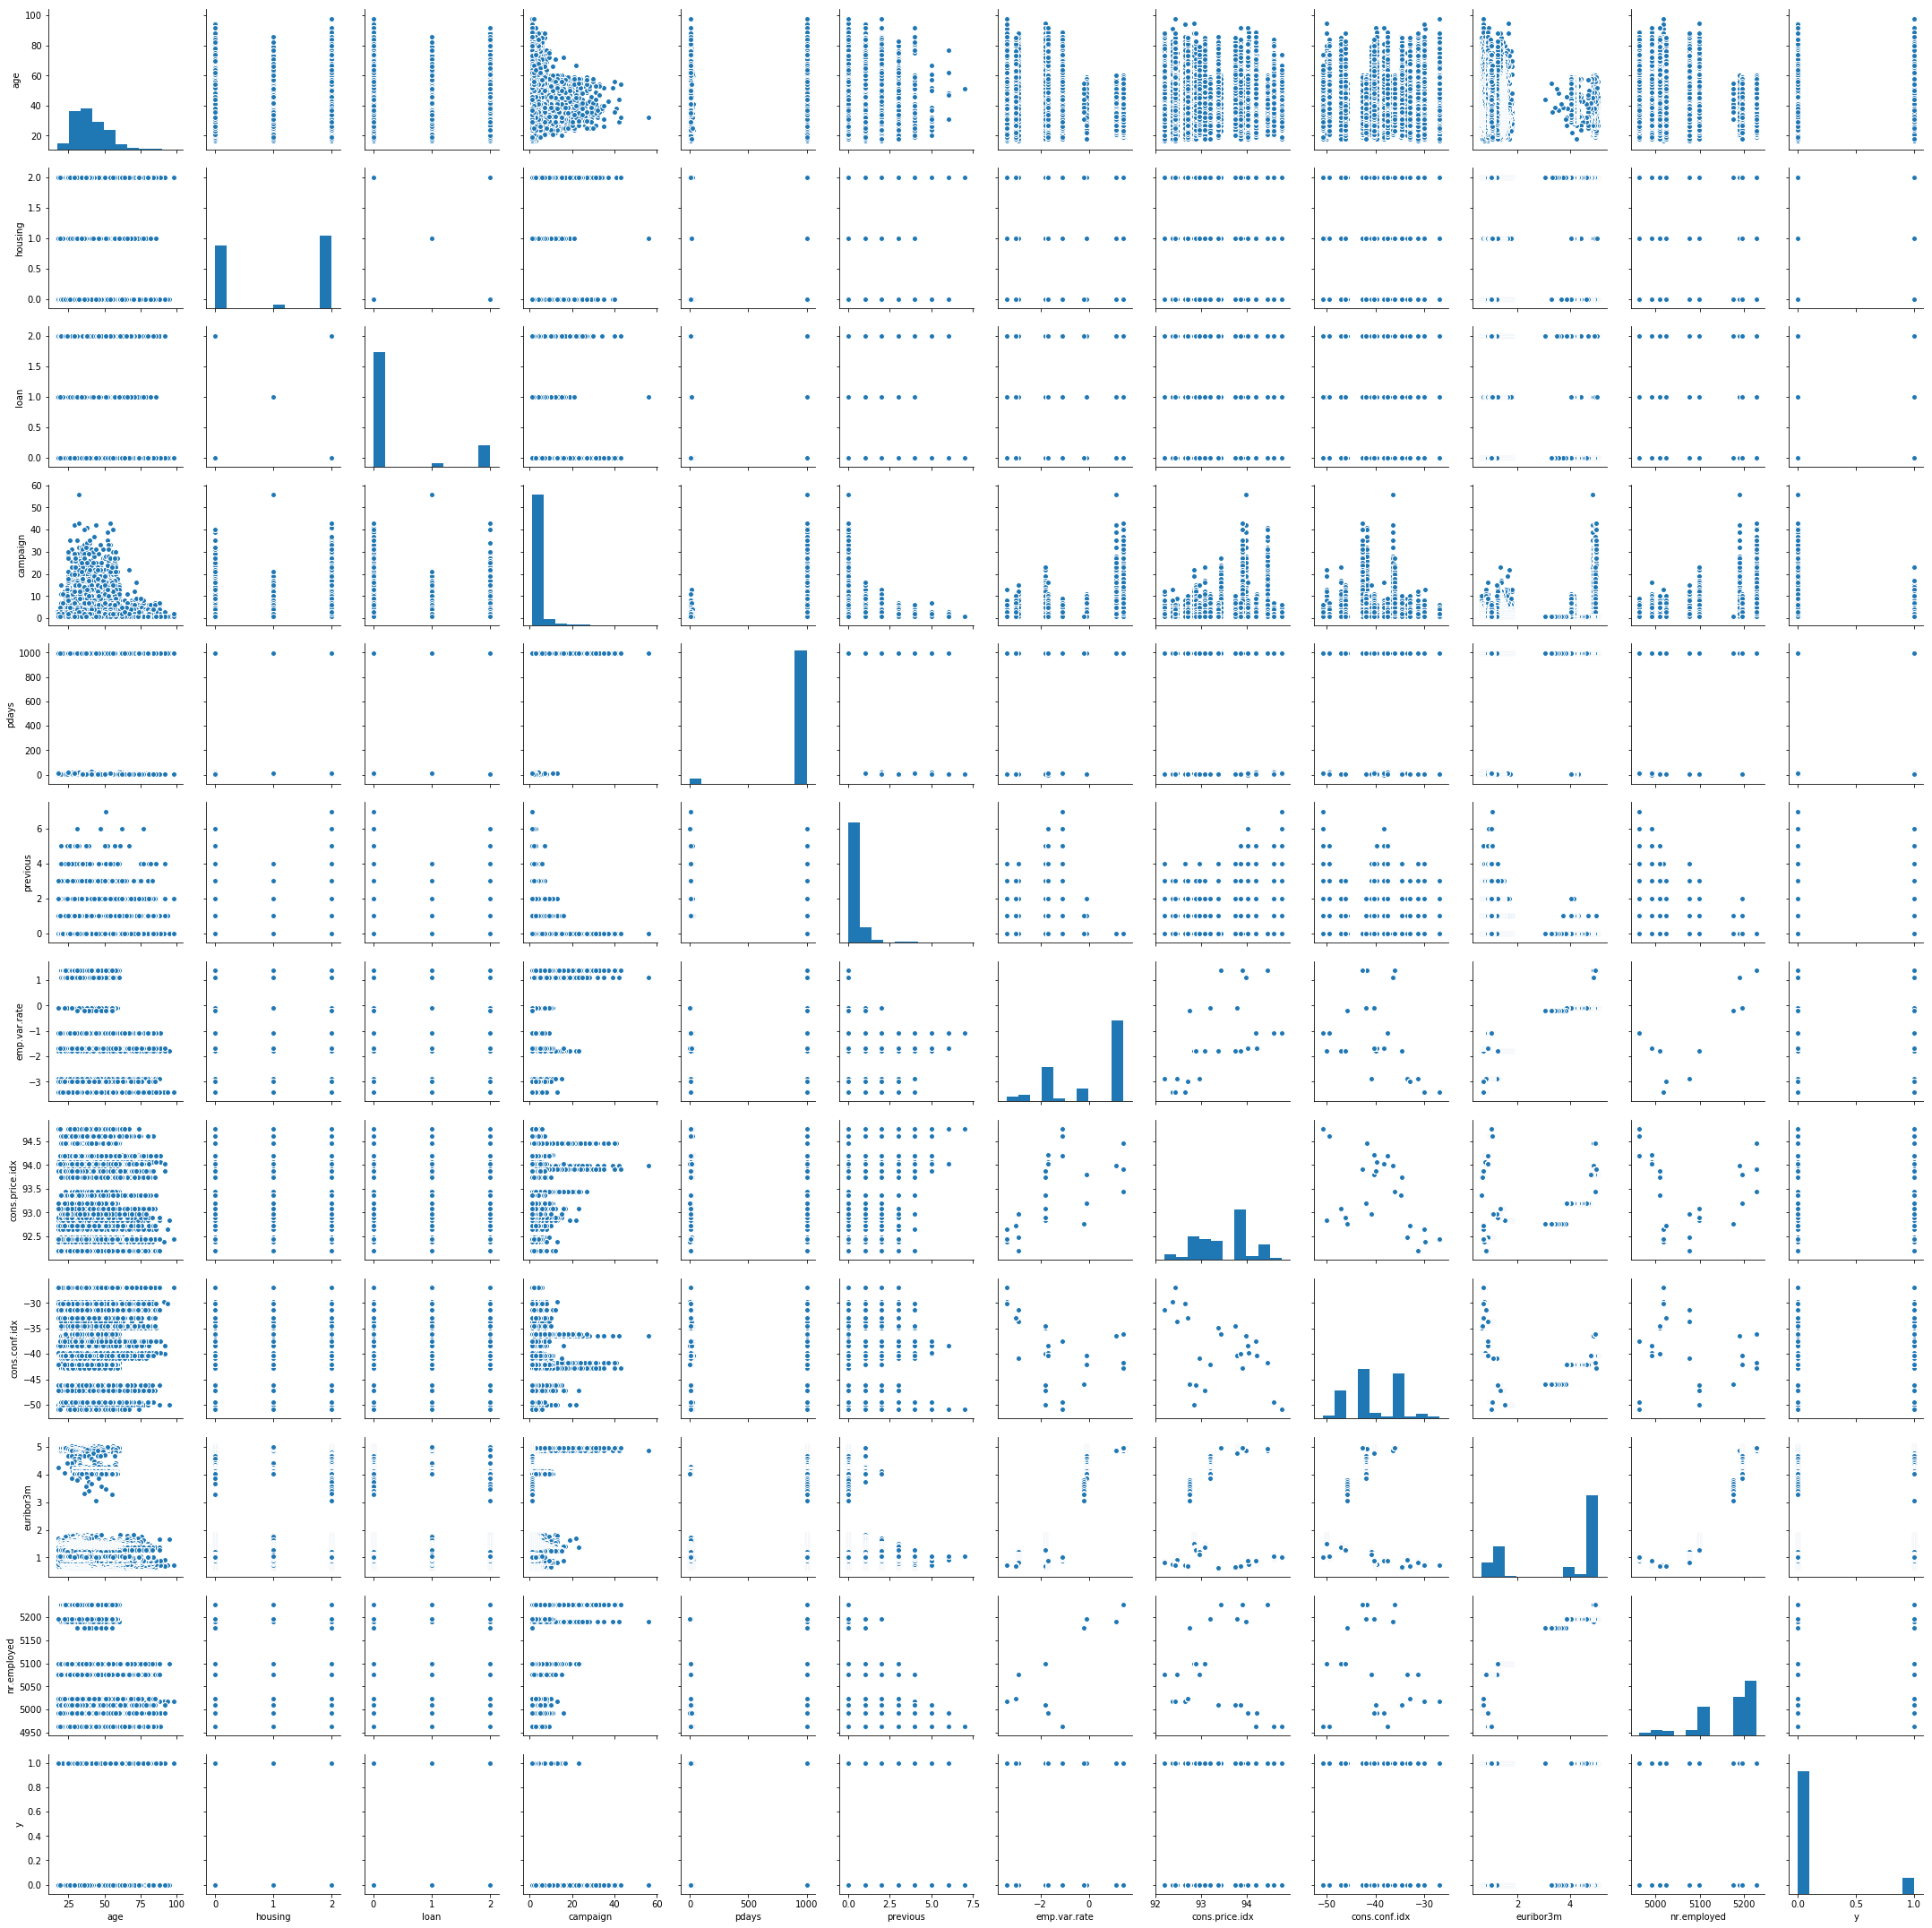

In [52]:
sns.pairplot(df)

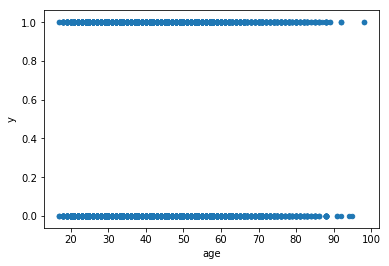

In [47]:
df.plot.scatter(x='age',y='y')

## Data Pre-Processing

In [78]:
from sklearn.preprocessing import LabelEncoder

y = df.y.values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['no', 'yes'], dtype=object)

In [79]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [92]:
"""
PREPROCESS YOUR X
"""
#df['marital']=le.fit_transform(df.marital.values)
#features = ['job','poutcome','education','pdays','emp.var.rate']
#X = df[features]
X = df.drop('y',1)
X = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week','poutcome'])
X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


# Model Selection

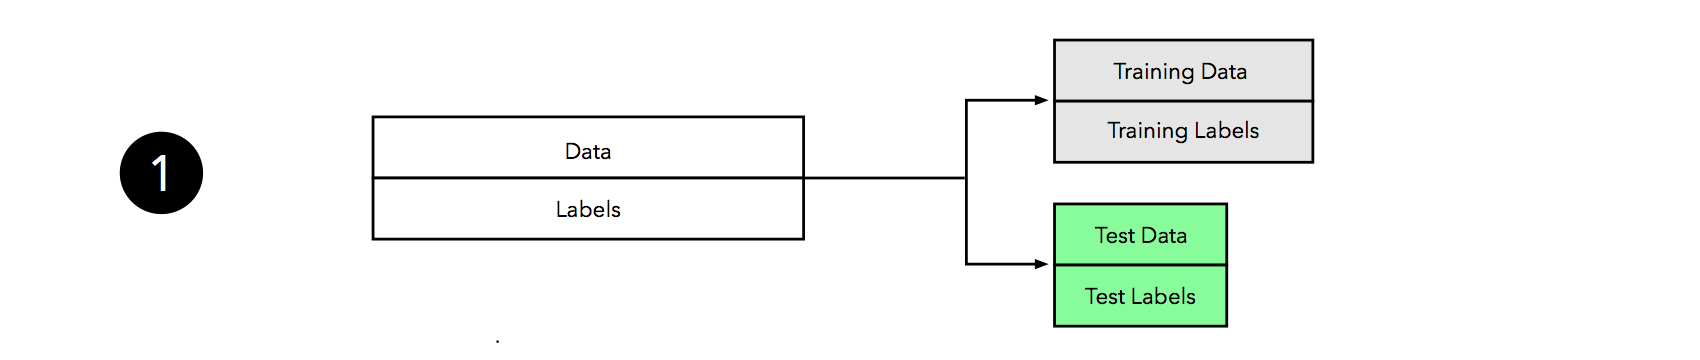

In [7]:
Image(filename='images/ms_1.png', width=1000) 

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.2,
                     stratify=y,
                     random_state=1)
    
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.901


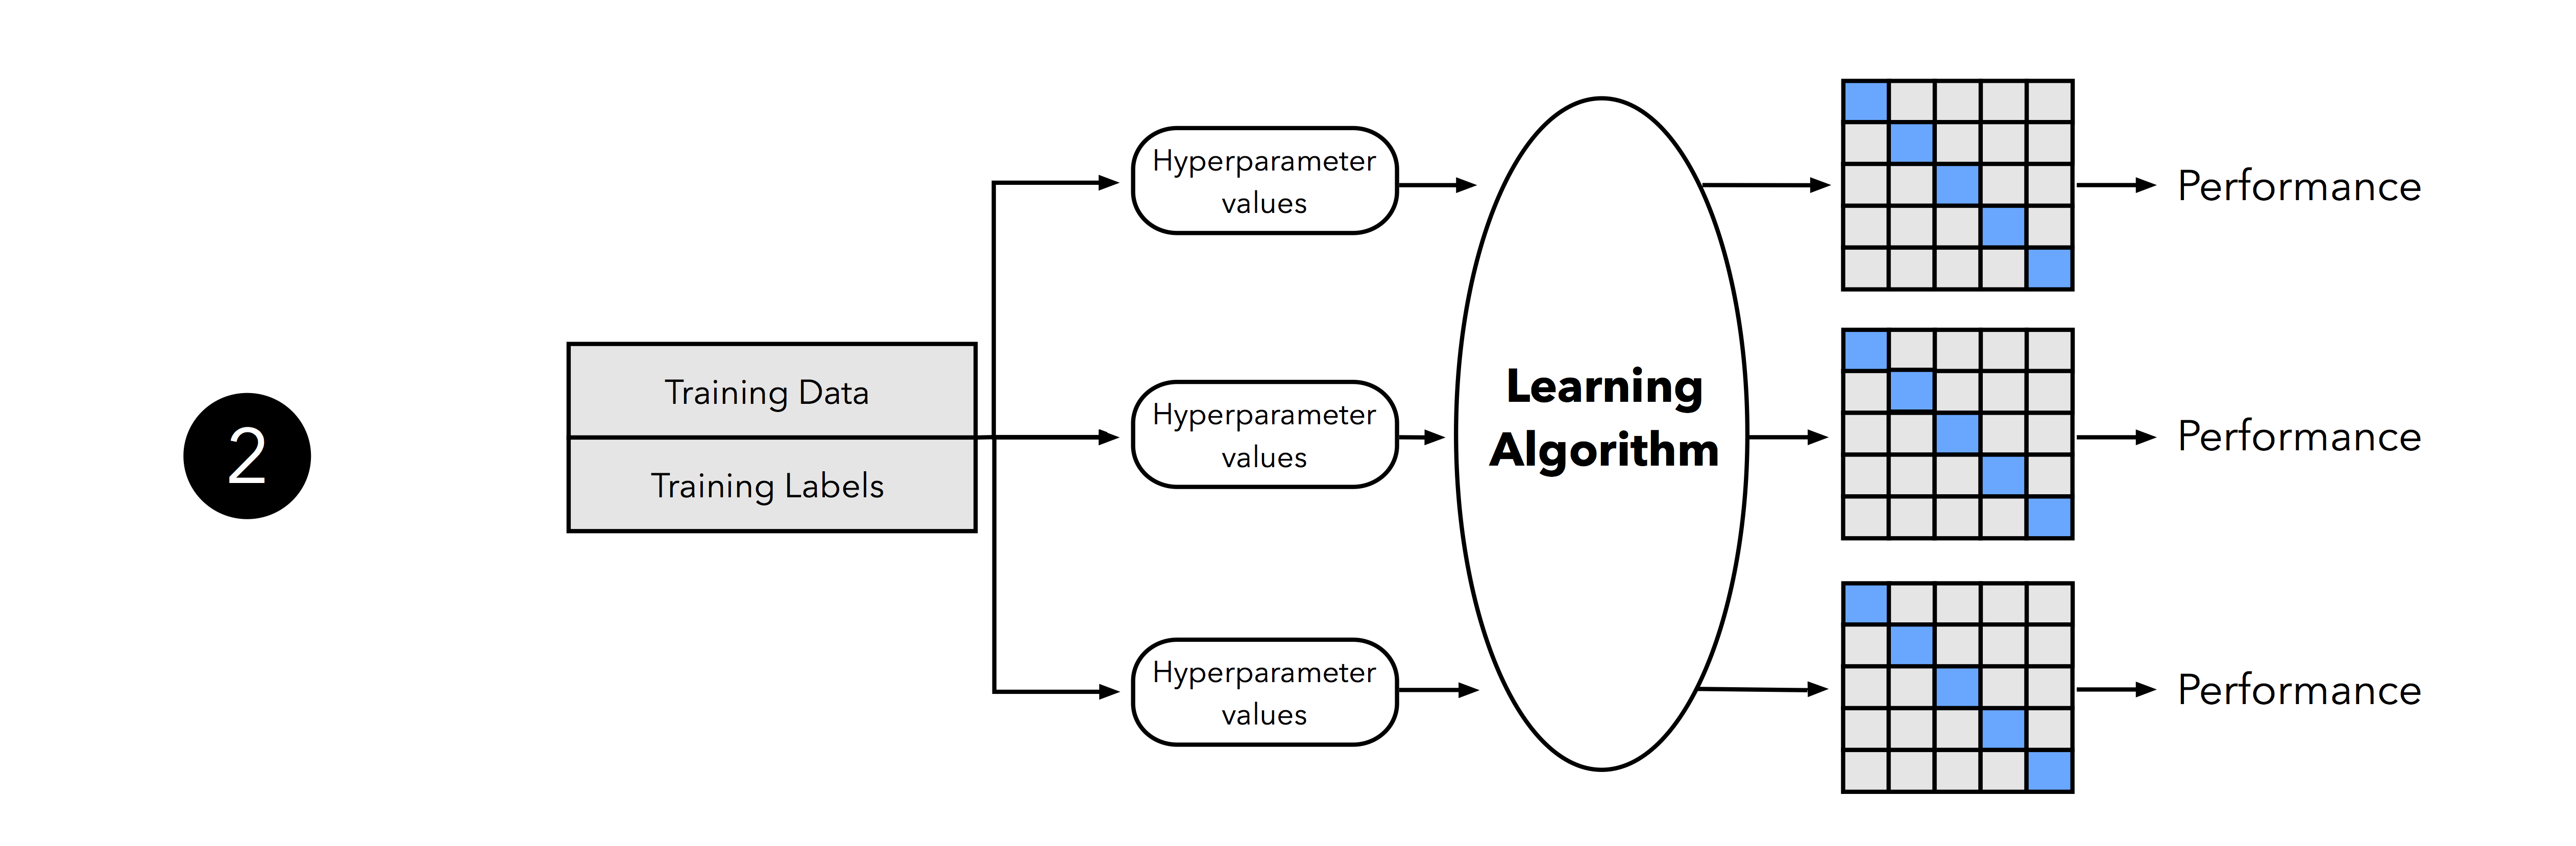

In [8]:
Image(filename='images/ms_2.png', width=1000) 

In [97]:
"""
DO HYPER-PARAMETER SEARCH
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

param_grid_lr = [{'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}]
# C is the regularised parameter, Alpha?

gs_lr = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid_lr, 
                  scoring='roc_auc', 
                  cv=10,
                  refit=True)

gs_lr = gs_lr.fit(X_train, y_train)

print(gs_lr.best_score_)
print(gs_lr.best_params_)

pipe_dt = make_pipeline(DecisionTreeClassifier(random_state=1))

param_grid_dt = [{'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
               'decisiontreeclassifier__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]}]

gs_dt = GridSearchCV(estimator=pipe_dt,
                  param_grid=param_grid_dt,
                  scoring='roc_auc',
                  cv=10,
                  refit=True)

gs_dt = gs_dt.fit(X_train, y_train)

print(gs_dt.best_score_)
print(gs_dt.best_params_)

0.791766909122
{'logisticregression__C': 0.1}
0.790310306758
{'decisiontreeclassifier__max_depth': 7, 'decisiontreeclassifier__min_samples_leaf': 7}


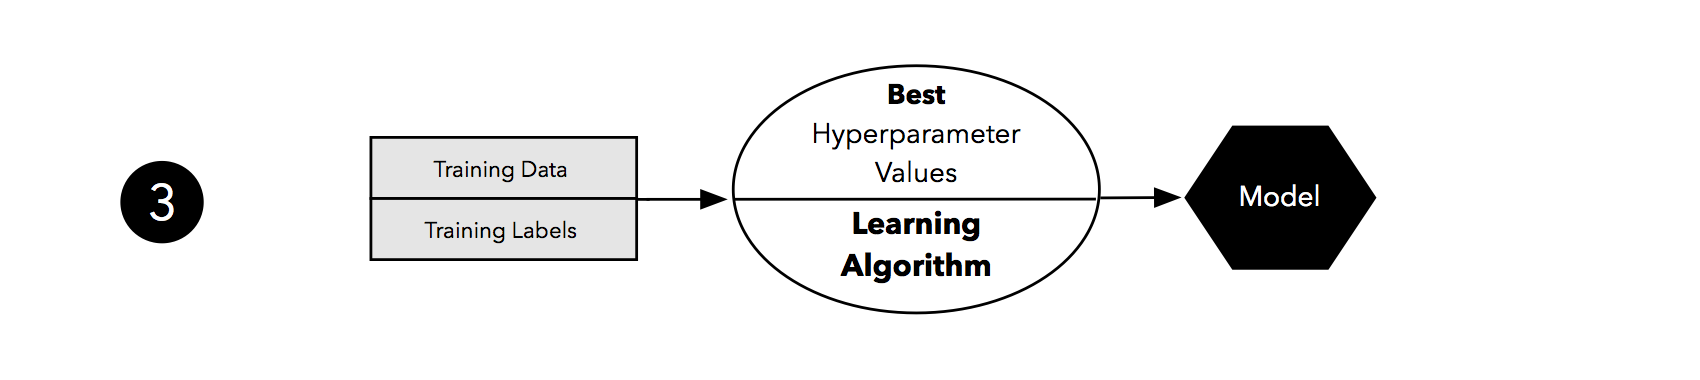

In [9]:
Image(filename='images/ms_3.png', width=1000)

In [90]:
"""
SELECT BEST ESTIMATOR IN EACH ALGORITHM
"""
#select best estimator for each algorithm
best_lr = gs_lr.best_estimator_
best_dt = gs_dt.best_estimator_

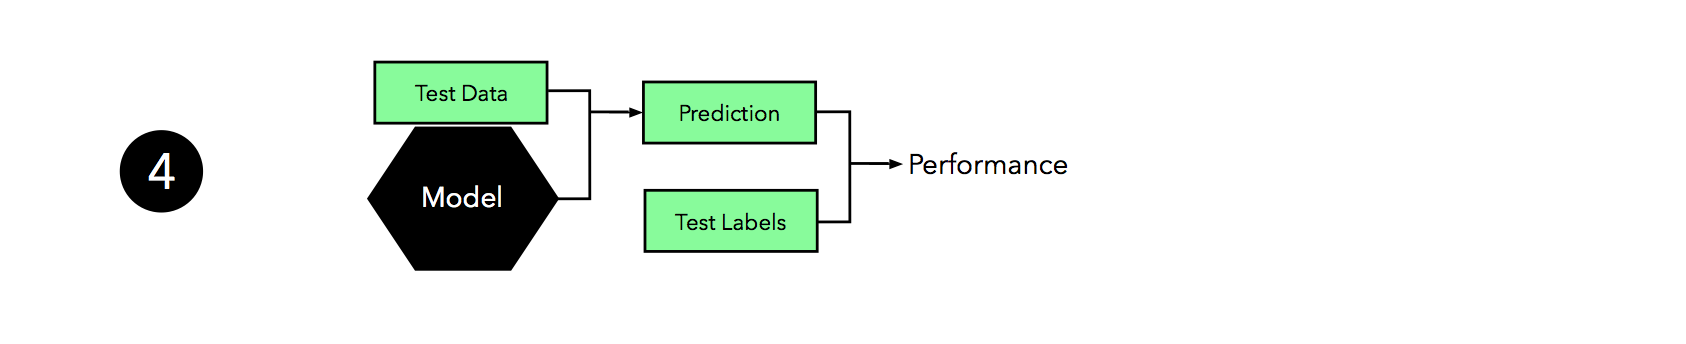

In [10]:
Image(filename='images/ms_4.png', width=1000) 

In [155]:
"""
EVALUATE YOUR MODEL ON TEST DATA
AND PICK YOUR BEST MODEL
"""
from sklearn.metrics import accuracy_score

y_pred_lr_test = best_lr.predict(X_test)
y_pred_dt_test = best_dt.predict(X_test)

y_pred_lr_train = best_lr.predict(X_train)
y_pred_dt_train = best_dt.predict(X_train)

y_pred_lr_prob = best_lr.predict_proba(X_test)
threshold = 0.6
y_pred_lr_test2 = le.fit_transform(y_pred_lr_prob[:,1]>threshold)

print("Training Error")
print('Logistic Regression Train Accuracy: %.3f' % accuracy_score(y_true=y_train, y_pred=y_pred_lr_train))
#print("Logistic Regression (threshold = {}) Train Accuracy: {}".format(threshold,accuracy_score(y_true=y_test, y_pred=y_pred_lr_test2)
print('Decision Tree Train Accuracy: %.3f' % accuracy_score(y_true=y_train, y_pred=y_pred_dt_train))

print("---------------")
print("Testing Error")
print('Logistic Regression Test Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_lr_test))
print('Decision Tree Test Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_dt_test))



#abs(y_test-y_pred_lr_test2).mean
#y_pred_lr_test2.size

Training Error
Logistic Regression Train Accuracy: 0.900
Decision Tree Train Accuracy: 0.906
---------------
Testing Error
Logistic Regression Test Accuracy: 0.901
Decision Tree Test Accuracy: 0.900


In [95]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_lr_test, labels=[1, 0])
print(confmat)

[[ 211  717]
 [  99 7211]]


## Calculate ROC_AUC Score

In [98]:
from sklearn.metrics import roc_auc_score

"""
GET Y_PROBA
"""
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_lr_test))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_lr_test))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_lr_test))

y_proba = best_lr.predict_proba(X_test)[:, 1]
print('AUC Score: %.3f' % roc_auc_score(y_true=y_test, y_score=y_proba))

Precision: 0.681
Recall: 0.227
F1: 0.341
AUC Score: 0.792


In [106]:
# generate class probabilities
probs = best_lr.predict_proba(X_test)
print(probs[:,0]>0.7)

[ True  True  True ..., False  True  True]


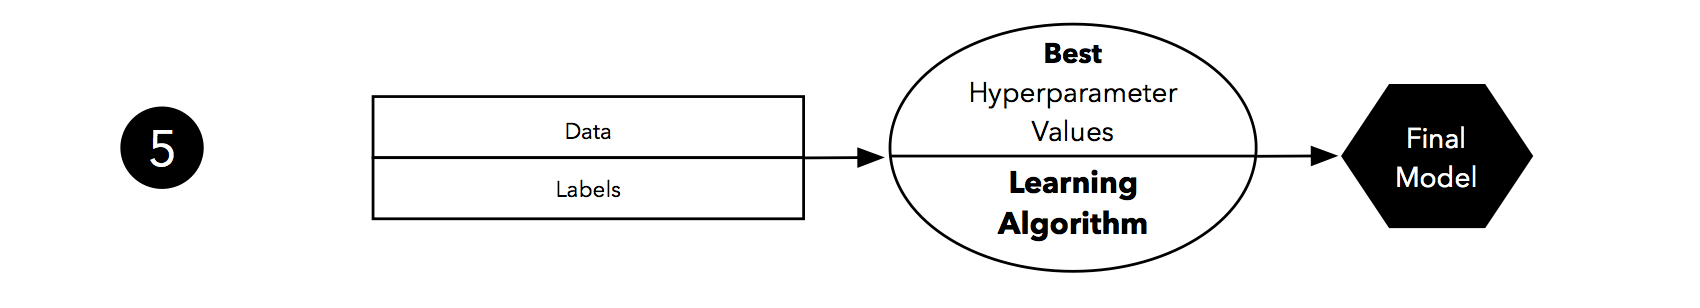

In [11]:
Image(filename='images/ms_5.png', width=1000) 

In [99]:
"""
FIT MODEL ON THE ENTIRE DATA SET
"""
final_model = best_lr.fit(X, y)
print(final_model)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_i...nalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])
